<a href="https://colab.research.google.com/github/bbellaborges/Ci-ncia-de-dados-aplicada-a-mobilidade-urbana/blob/main/CDMU_AED_e_Limpeza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de dados de interesse: paraciclos da cidade de Niterói.


In [ ]:
# Manipulação dos dados em python
import pandas as pd
import numpy as np

# Visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Paraciclos.csv to Paraciclos (1).csv


In [ ]:

# Leitura dos dados csv
df = pd.read_csv("Paraciclos.csv")

In [ ]:
# Criar uma copia do DataFrame por seguranca
dfi = df.copy()

# Estatísticas descritivas e limpeza dos dados.

## Estrutura do dataset

In [ ]:
dfi.head()

,X,Y,li_anoinstalacao,tx_nome,tx_bairro,tx_material,tx_orgao,tx_tipo,tx_pontoreferencia,globalid,tx_nvagas,objectid_1
0,693946.4556,7.465782e+06,2012.0,Gavião Peixoto 194,Icaraí,,-,Pórtico,Em frente ao Campo de São Bento,{FA46B634-8492-4865-A71F-8BF38C54E2D4},16 vagas,1
1,691732.0951,7.466370e+06,2012.0,"Praça Leoni Ramos, 19",São Domingos,,-,U invertido,Cantareira,{5354F7C7-FDBF-4B9C-AED6-0A566AB50392},06 vagas,2
2,691747.6449,7.466403e+06,2012.0,Rua José Bonifácio,São Domingos,,-,Pórtico,Cantareira,{A5FA9FC4-202C-4876-9327-30B14CA2C8F5},12 vagas,3
3,692018.1557,7.467633e+06,2014.0,Caminho Niemeyer 2,Centro,inox,NdB/Emusa,U invertido,Junto ao bloco administrativo,{D597F69C-2FF6-42E7-A2E2-611992D3BF56},10 vagas,4
4,692007.1364,7.465901e+06,2014.0,Museu Janete Costa,São Domingos,inox,NdB/Emusa,U invertido,Interior do museu,{7BBA73A6-BAAF-4C99-965D-FBDEC1350F71},10 vagas,5


In [ ]:
dfi.describe()

,X,Y,li_anoinstalacao,objectid_1
count,417.000000,4.170000e+02,400.000000,417.000000
mean,695055.009260,7.465329e+06,2018.065000,209.000000
std,2988.800762,2.552242e+03,2.790204,120.521782
min,691242.010100,7.457867e+06,2012.000000,1.000000
25%,692966.025300,7.464173e+06,2016.000000,105.000000
50%,694090.274700,7.465919e+06,2018.000000,209.000000
75%,695474.828000,7.467020e+06,2020.000000,313.000000
max,706665.868900,7.470836e+06,2023.000000,417.000000


In [ ]:
dfi.dtypes

,0
X,float64
Y,float64
li_anoinstalacao,float64
tx_nome,object
tx_bairro,object
tx_material,object
tx_orgao,object
tx_tipo,object
tx_pontoreferencia,object
globalid,object


In [ ]:
#Identificar valores nulos e ausentes
datadict = pd.DataFrame(dfi.dtypes) #Cria um novo DataFrame chamado datadict q contém os tipos de dados (dtypes) de cada coluna de dfi
datadict.columns = ["Dtype"] #Renomeia a única coluna de datadict para "Dtype", indicando que essa coluna contém o tipo de dado de cada variável.
datadict['Valores_Nulos'] = dfi.isnull().sum() #Cria uma nova col "Valores_Nulos"; dfi.isnull() retorna um df booleano com True onde os valores são nulos e os conta
datadict['%_Valores_Nulos'] = (dfi.isnull().sum() / dfi.shape[0]) * 100 #diciona uma nova coluna que mostra o percentual de valores nulos por coluna.
datadict['NUnique']=dfi.nunique() #Add uma col que mostra o núm de valores únicos em cada coluna de dfi p entender o tipo da variável, se é quase constante, ou muito dispersa.



In [ ]:
datadict #Valores nulos

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
X,float64,0,0.000000,410
Y,float64,0,0.000000,410
li_anoinstalacao,float64,17,4.076739,11
tx_nome,object,12,2.877698,368
tx_bairro,object,1,0.239808,37
tx_material,object,60,14.388489,9
tx_orgao,object,97,23.261391,11
tx_tipo,object,22,5.275779,9
tx_pontoreferencia,object,8,1.918465,349
globalid,object,0,0.000000,417


## Limpeza dos dados:

### Renomeando colunas para nomes mais claros:

In [ ]:
dfi.rename(columns={
    'X': 'longitude_utm',
    'Y': 'latitude_utm',
    'li_anoinstalacao': 'ano_instalacao',
    'tx_nome': 'nome',
    'tx_bairro': 'bairro',
    'tx_material': 'material',
    'tx_orgao': 'orgao_responsavel',
    'tx_tipo': 'tipo',
    'tx_pontoreferencia': 'ponto_referencia',
    'tx_nvagas': 'num_vagas',
    'objectid_1': 'id'
}, inplace=True)


### Corrigir discrepâncias nos dados:

In [ ]:
#Remover texto da coluna num_vagas e transformar em número:
dfi['num_vagas'] = dfi['num_vagas'].str.extract('(\d+)').astype(float)

### Padronizar variáveis categóricas

In [ ]:
# Lista de colunas categóricas
colunas_categoricas = ['material', 'orgao_responsavel', 'tipo']

# Mostrar valores únicos de cada coluna
for col in colunas_categoricas:
    print(f"\n🔹 Coluna: {col}")
    print(dfi[col].dropna().unique())  # mostra apenas valores não nulos



🔹 Coluna: material
[' ' 'inox' 'galv' 'Inox' 'Galvanizado' 'Galv' 'Aço inox' 'INOX'
 'Aço Inox']

🔹 Coluna: orgao_responsavel
['-' 'NdB/Emusa' 'Seconser' 'Ndb' 'NdB' 'Niterói de Bicicleta'
 'NdB/Seconser' 'Nbd/Seconser' 'Ndb/Seconser' 'CONB' 'CPNB']

🔹 Coluna: tipo
['Pórtico' 'U invertido' 'MAC' 'V' 'U Invertido' 'Espiral' 'U - invertido'
 'U-invertido' 'U-Invertido']


In [ ]:
# Padronização completa da coluna 'material'
dfi['material'] = dfi['material'].str.strip().str.lower()

dfi['material'] = dfi['material'].replace({
    'galv': 'Galvanizado',
    'galvanizado': 'Galvanizado',
    'aço inox': 'Inox',
    'aço inoxidável': 'Inox',
    'inox': 'Inox',
    'inoxidável': 'Inox',
    'aço inoxidavel': 'Inox',
    'aço inox.': 'Inox',
    'aço-inox': 'Inox',
    'aço': 'Inox',
    '': 'Sem informação',
    'nan': 'Sem informação'
})

# Para garantir que os valores finais fiquem capitalizados corretamente
dfi['material'] = dfi['material'].str.capitalize()



In [ ]:
#Padronizar letras para evitar distinção por maiúsculas/minúsculas
dfi['orgao_responsavel'] = dfi['orgao_responsavel'].str.strip().str.lower()

#Substituir variações por formas padronizadas
dfi['orgao_responsavel'] = dfi['orgao_responsavel'].replace({
    '-': 'sem informação',
    'ndb': 'Niterói de Bicicleta',
    'ndb/emusa': 'Niterói de Bicicleta',
    'ndb/seconser': 'Niterói de Bicicleta / Seconser',
    'nbd/seconser': 'Niterói de Bicicleta / Seconser',
    'seconser': 'Seconser',
    'niterói de bicicleta': 'Niterói de Bicicleta',
    'conb': 'Niterói de Bicicleta',
    'cpnb': 'Niterói de Bicicleta'
})

#Capitalizar padrão para visualização consistente
dfi['orgao_responsavel'] = dfi['orgao_responsavel'].str.title()



In [ ]:
#Padronizar caixa e remover espaços extras
dfi['tipo'] = dfi['tipo'].str.strip().str.lower()

#Substituir variações
dfi['tipo'] = dfi['tipo'].replace({
    'u-invertido': 'u invertido',
    'u - invertido': 'u invertido',
    'u invertido': 'u invertido',
    'u invertido': 'u invertido',  # redundância segura
})

#Padronizar maiúsculas apenas na primeira letra (ou manter tudo minúsculo, se preferir)
dfi['tipo'] = dfi['tipo'].replace({
    'pórtico': 'Pórtico',
    'mac': 'MAC',
    'v': 'V',
    'espiral': 'Espiral',
    'u invertido': 'U invertido'
})



In [ ]:
#capitalização uniforme

for col in ['material', 'orgao_responsavel', 'tipo']:
    dfi[col] = dfi[col].str.strip().str.lower().str.capitalize()


### NA: Tratando valores por tipo de coluna:




In [ ]:
# Variáveis numéricas - preencher com mediana
dfi['ano_instalacao'].fillna(dfi['ano_instalacao'].median(), inplace=True)
dfi['num_vagas'].fillna(dfi['num_vagas'].median(), inplace=True)

# Variáveis categóricas (tipo object) - preencher com moda
dfi['nome'].fillna(dfi['nome'].mode()[0], inplace=True)
dfi['bairro'].fillna(dfi['bairro'].mode()[0], inplace=True)
dfi['material'].fillna(dfi['material'].mode()[0], inplace=True)
dfi['orgao_responsavel'].fillna(dfi['orgao_responsavel'].mode()[0], inplace=True)
dfi['tipo'].fillna(dfi['tipo'].mode()[0], inplace=True)
dfi['ponto_referencia'].fillna(dfi['ponto_referencia'].mode()[0], inplace=True)


<ipython-input-84-cb4ba95693fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfi['ano_instalacao'].fillna(dfi['ano_instalacao'].median(), inplace=True)
<ipython-input-84-cb4ba95693fe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
#Verificar se faltou tratar alguma coluna:


dfi.isnull().sum()

,0
longitude_utm,0
latitude_utm,0
ano_instalacao,0
nome,0
bairro,0
material,0
orgao_responsavel,0
tipo,0
ponto_referencia,0
globalid,0


### Outlier:

O banco não apresenta outliers

In [ ]:
'''
def identificar_outliers(coluna):
    data = dfi[coluna].dropna()  #Remover valores ausentes

    #Cálculo dos quartis
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1'

    #Definindo limites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = data[(data < limite_inferior) | (data > limite_superior)]
    print(f'Outliers na coluna {coluna}:')
    print(outliers)
    print()  #Linha em branco para melhor visualização

#Lista de colunas numéricas da sua base
colunas_para_analisar = ['longitude_utm', 'latitude_utm', 'ano_instalacao', 'num_vagas']

#Aplicar a função de outliers a cada coluna
for coluna in colunas_para_analisar:
    identificar_outliers(coluna)
'''

### Visualização pós limpeza:

In [ ]:
dfi.head()
dfi.info()
dfi.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   longitude_utm      417 non-null    float64
 1   latitude_utm       417 non-null    float64
 2   ano_instalacao     417 non-null    float64
 3   nome               417 non-null    object 
 4   bairro             417 non-null    object 
 5   material           417 non-null    object 
 6   orgao_responsavel  417 non-null    object 
 7   tipo               417 non-null    object 
 8   ponto_referencia   417 non-null    object 
 9   globalid           417 non-null    object 
 10  num_vagas          417 non-null    float64
 11  id                 417 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 39.2+ KB


,longitude_utm,latitude_utm,ano_instalacao,nome,bairro,material,orgao_responsavel,tipo,ponto_referencia,globalid,num_vagas,id
count,417.000000,4.170000e+02,417.000000,417,417,417,417,417,417,417,417.000000,417.000000
unique,NaN,NaN,NaN,368,37,5,8,6,349,417,NaN,NaN
top,NaN,NaN,NaN,Av. Amaral Peixoto,Icaraí,Inox,Ndb/emusa,U invertido,Calçada junto a ciclovia,{5833085C-03DF-4F2A-8452-0C51B9750BDD},NaN,NaN
freq,NaN,NaN,NaN,23,126,335,256,375,27,1,NaN,NaN
mean,695055.009260,7.465329e+06,2018.062350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.515588,209.000000
std,2988.800762,2.552242e+03,2.732628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.269230,120.521782
min,691242.010100,7.457867e+06,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,692966.025300,7.464173e+06,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,105.000000
50%,694090.274700,7.465919e+06,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,209.000000
75%,695474.828000,7.467020e+06,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,313.000000


Com a nossa base limpa e organizada, vamos agora a:

# Estatística descritiva:

In [ ]:
# Selecionar colunas numéricas automaticamente
dfi_num = dfi.select_dtypes(include=['float64', 'int64'])

# Estatísticas descritivas
mediana = dfi_num.median()
media = dfi_num.mean()
moda = dfi_num.mode().iloc[0]  # pega a primeira moda se houver mais de uma
desvio_padrao = dfi_num.std()
quartis = dfi_num.quantile([0.25, 0.5, 0.75])

# Impressão formatada
print(f"Mediana:\n{mediana}\n")
print(f"Média:\n{media}\n")
print(f"Moda:\n{moda}\n")
print(f"Desvio padrão:\n{desvio_padrao}\n")
print(f"Quartis:\n{quartis}\n")


Mediana:
longitude_utm     6.940903e+05
latitude_utm      7.465919e+06
ano_instalacao    2.018000e+03
num_vagas         6.000000e+00
id                2.090000e+02
dtype: float64

Média:
longitude_utm     6.950550e+05
latitude_utm      7.465329e+06
ano_instalacao    2.018062e+03
num_vagas         8.515588e+00
id                2.090000e+02
dtype: float64

Moda:
longitude_utm     6.953774e+05
latitude_utm      7.463621e+06
ano_instalacao    2.017000e+03
num_vagas         4.000000e+00
id                1.000000e+00
Name: 0, dtype: float64

Desvio padrão:
longitude_utm     2988.800762
latitude_utm      2552.241921
ano_instalacao       2.732628
num_vagas            7.269230
id                 120.521782
dtype: float64

Quartis:
      longitude_utm  latitude_utm  ano_instalacao  num_vagas     id
0.25    692966.0253  7.464173e+06          2016.0        4.0  105.0
0.50    694090.2747  7.465919e+06          2018.0        6.0  209.0
0.75    695474.8280  7.467020e+06          2020.0       10.0  

- Localização geográfica (longitude_utm, latitude_utm)
Os paraciclos estão concentrados entre 692.966 e 695.475 UTM de longitude, e entre 7.464.173 e 7.467.020 UTM de latitude.

Isso mostra uma área geográfica relativamente compacta, como esperado para um município.

- Ano de instalação (ano_instalacao)
Mediana = 2018, moda = 2017 → indica um pico de instalações entre 2017–2018.

Desvio padrão = 2,73 → variação pequena, ou seja, os paraciclos foram instalados em um período relativamente concentrado.

- Número de vagas (num_vagas)
Média = 8,5, mediana = 6, moda = 4, Q3 = 10

Distribuição assimétrica à direita: poucos pontos com alto número de vagas puxam a média para cima.

Desvio padrão = 7,27 → variação alta entre o númedo de vagas dos paraciclos.



# Visualização: Histogramas, boxplots e mapas

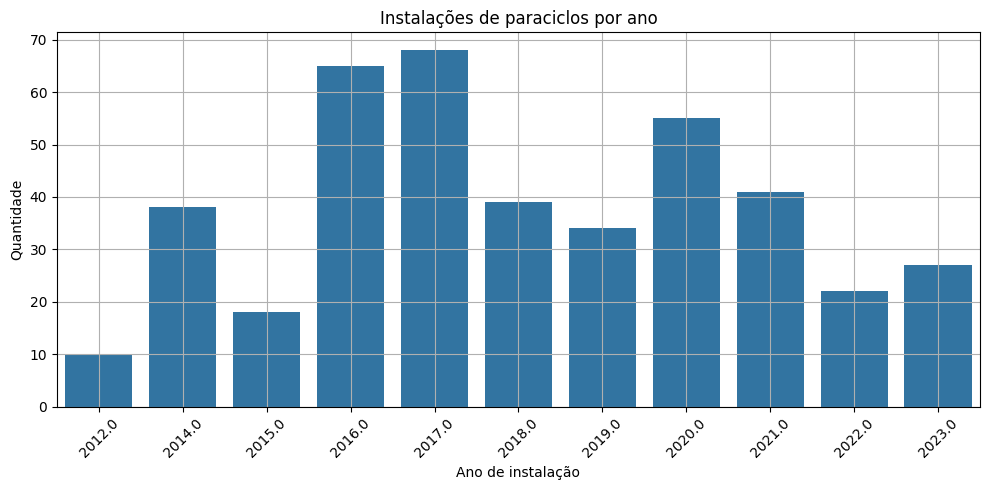

In [ ]:
#Instalações de paraciclos por ano:

plt.figure(figsize=(10, 5))
sns.countplot(data=dfi, x='ano_instalacao', order=sorted(dfi['ano_instalacao'].dropna().unique()))
plt.title("Instalações de paraciclos por ano")
plt.xlabel("Ano de instalação")
plt.ylabel("Quantidade")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


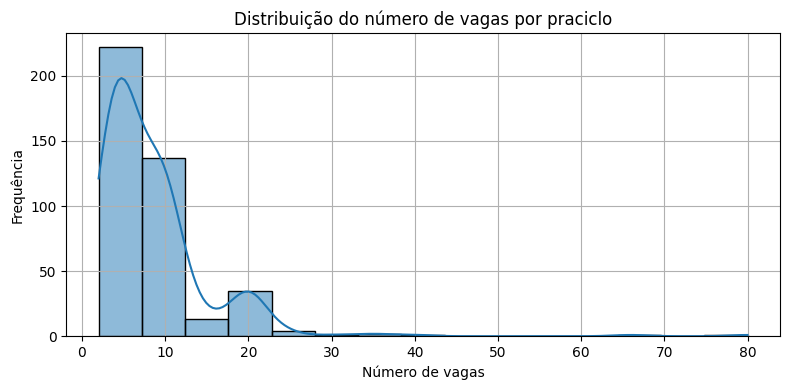

In [ ]:
#Histograma do número de vagas de paraciclos
plt.figure(figsize=(8, 4))
sns.histplot(dfi['num_vagas'].dropna(), bins=15, kde=True)
plt.title("Distribuição do número de vagas por praciclo")
plt.xlabel("Número de vagas")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()


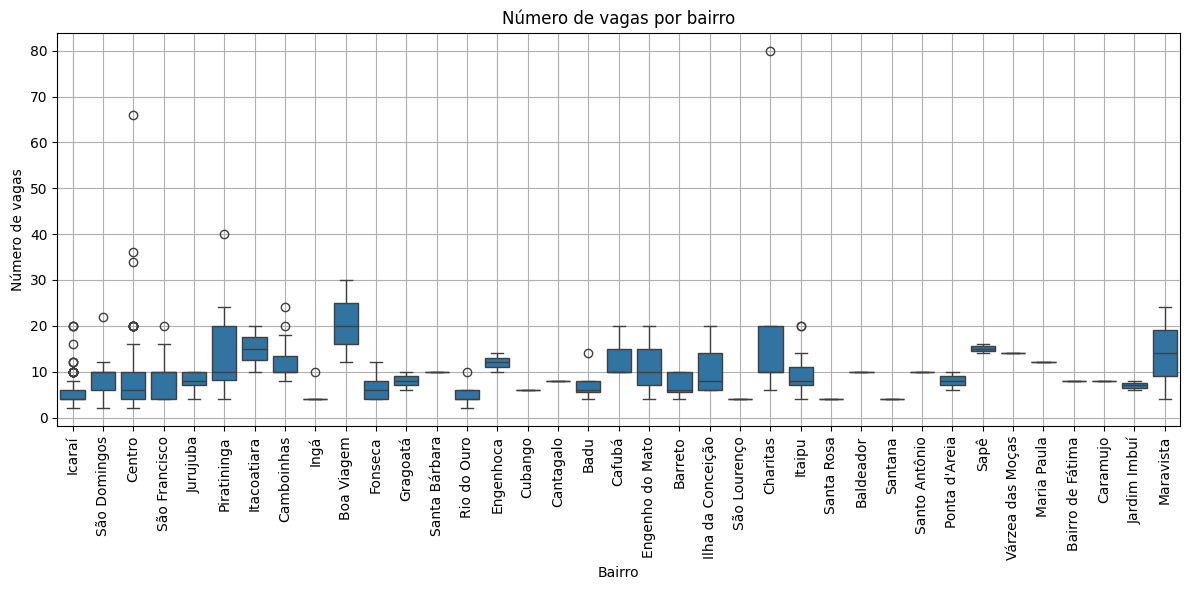

In [ ]:
#Boxplot do número de vagas por bairro
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfi, x='bairro', y='num_vagas')
plt.title("Número de vagas por bairro")
plt.xticks(rotation=90)
plt.xlabel("Bairro")
plt.ylabel("Número de vagas")
plt.grid(True)
plt.tight_layout()
plt.show()


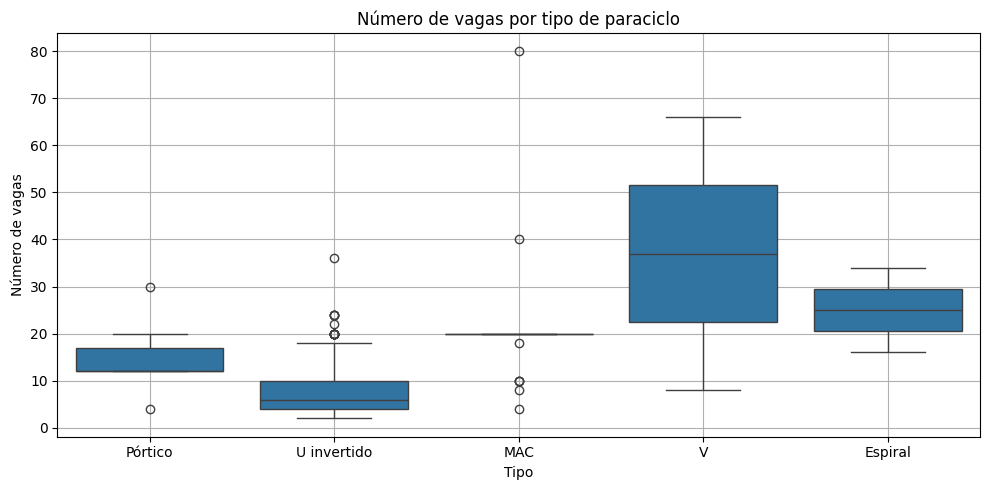

In [ ]:
#Boxplot do número de vagas por tipo de paraciclo

plt.figure(figsize=(10, 5))
sns.boxplot(data=dfi, x='tipo', y='num_vagas')
plt.title("Número de vagas por tipo de paraciclo")
plt.xlabel("Tipo")
plt.ylabel("Número de vagas")
plt.grid(True)
plt.tight_layout()
plt.show()


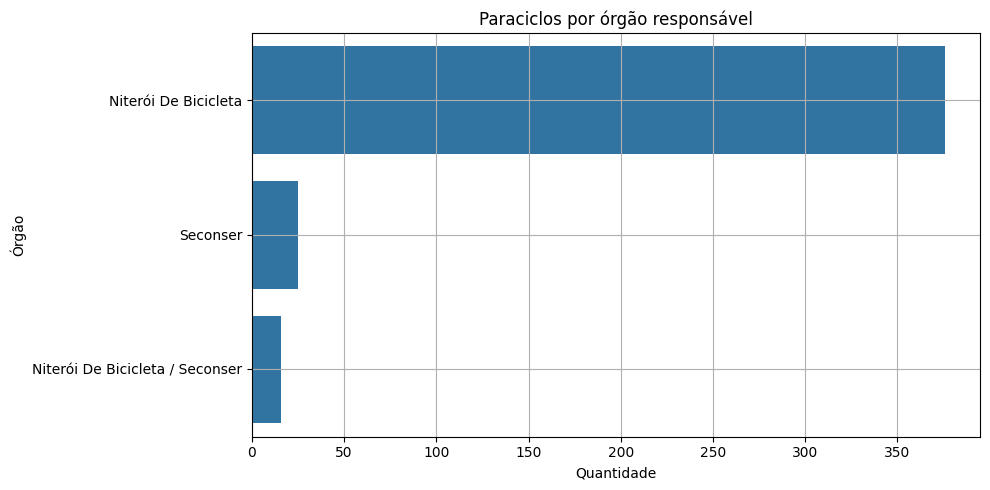

In [ ]:
#Contagem por órgão responsável:

plt.figure(figsize=(10, 5))
sns.countplot(data=dfi, y='orgao_responsavel', order=dfi['orgao_responsavel'].value_counts().index)
plt.title("Paraciclos por órgão responsável")
plt.xlabel("Quantidade")
plt.ylabel("Órgão")
plt.grid(True)
plt.tight_layout()
plt.show()


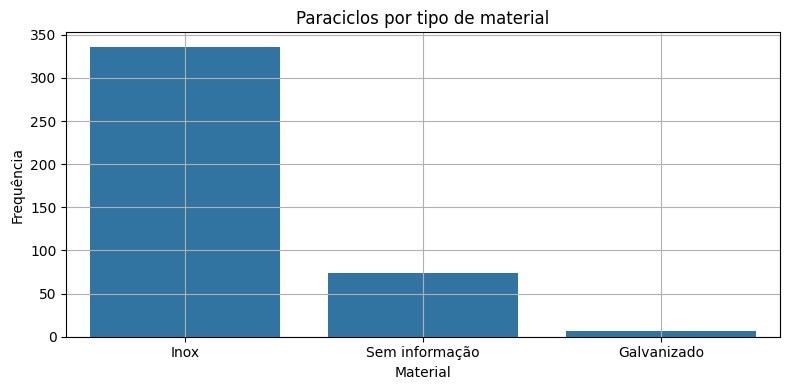

In [ ]:
#Contagem por material

plt.figure(figsize=(8, 4))
sns.countplot(data=dfi, x='material', order=dfi['material'].value_counts().index)
plt.title("Paraciclos por tipo de material")
plt.xlabel("Material")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()


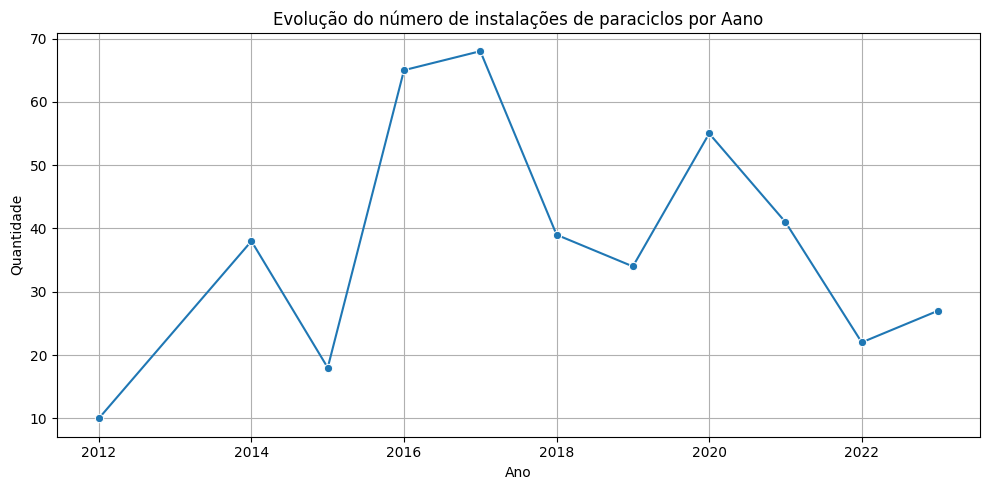

In [ ]:
#Evolução do número de instalações por ano

instalacoes_ano = dfi['ano_instalacao'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=instalacoes_ano.index, y=instalacoes_ano.values, marker='o')
plt.title("Evolução do número de instalações de paraciclos por Aano")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.grid(True)
plt.tight_layout()
plt.show()


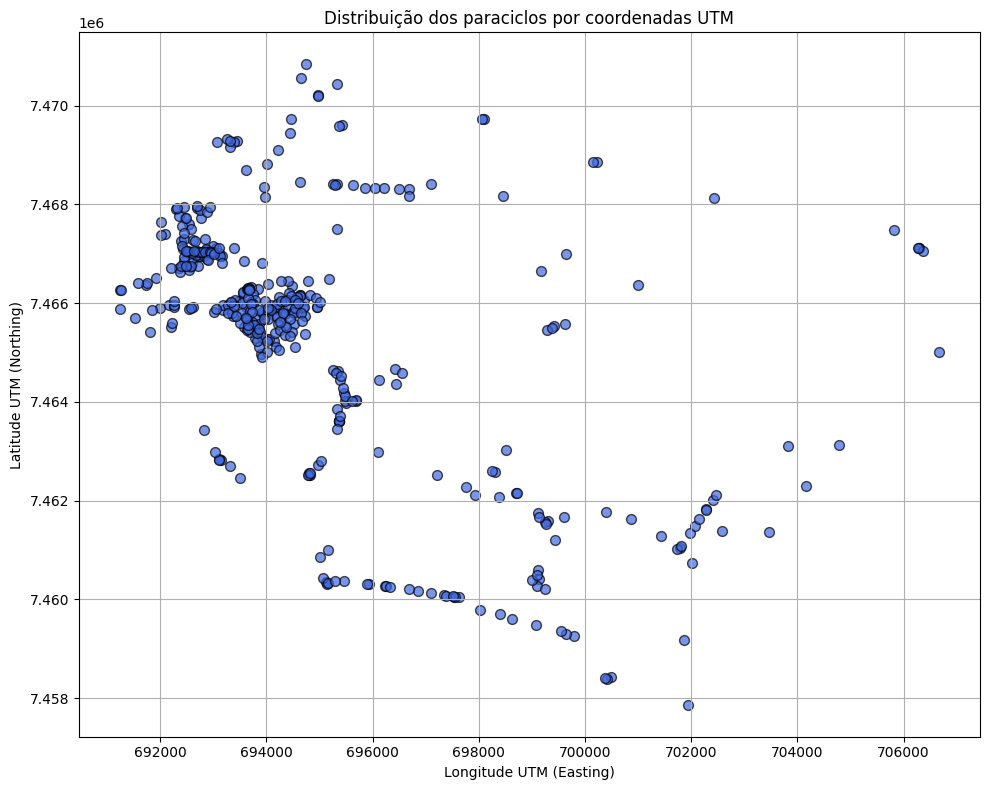

In [ ]:
#Mapa das coordenacas UTM convertidas

plt.figure(figsize=(10, 8))

#Scatter plot com as coordenadas UTM
plt.scatter(dfi['longitude_utm'], dfi['latitude_utm'],
            c='royalblue', edgecolor='black', s=50, alpha=0.7)

plt.title('Distribuição dos paraciclos por coordenadas UTM')
plt.xlabel('Longitude UTM (Easting)')
plt.ylabel('Latitude UTM (Northing)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Fazendo sobreposição com o mapa de Niterói

!pip install folium pyproj


In [ ]:
#converter coordenadas UTM para latitude-longitude

from pyproj import Transformer

# Defina a zona UTM do Rio de Janeiro e Niterói (Zona 23S, EPSG: 31983)
transformer = Transformer.from_crs("epsg:31983", "epsg:4326", always_xy=True)

# Aplique a transformação
dfi['lon'], dfi['lat'] = transformer.transform(dfi['longitude_utm'].values, dfi['latitude_utm'].values)


In [ ]:
#Plotar no mapa com a biblio folium

import folium

#centraliza o mapa na média das coordenadas
mapa = folium.Map(location=[dfi['lat'].mean(), dfi['lon'].mean()], zoom_start=13)

# Adiciona os marcadores
for _, row in dfi.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        popup=f"{row['nome']} - {row['bairro']} ({int(row['num_vagas'])} vagas)",
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(mapa)

#Exibe o mapa
mapa


In [ ]:
#Mapa de calor por número de vagas

from folium.plugins import HeatMap

#Mapa centrado na média das coordenadas
mapa_calor = folium.Map(location=[dfi['lat'].mean(), dfi['lon'].mean()], zoom_start=13)

#Dados para o HeatMap: [latitude, longitude, peso]
heat_data = [[row['lat'], row['lon'], row['num_vagas']] for index, row in dfi.iterrows()]

#Adiciona o HeatMap ao mapa
HeatMap(heat_data, radius=15, blur=10, max_zoom=15).add_to(mapa_calor)

#Exibe o mapa
mapa_calor
